In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sigma_cabs.csv', index_col='Trip_ID')
data = df.copy()
data

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2


In [4]:
# Посмотрим, сколько классов у таргета, и нет ли сильного дисбалланса классов
data['Surge_Pricing_Type'].value_counts()

,count
Surge_Pricing_Type,
2,56728
3,47720
1,27214


# EDA

## Numerical feature

In [5]:
data.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


**Описание числовых признаков**

Trip_Distance - Расстояние поездки, запрошенное клиентом ✅

Customer_Since_Months - Клиент пользуется услугами такси уже n месяцев; 0 месяцев означает текущий месяц ✅

Life_Style_Index - Фирменный индекс, созданный Sigma Cabs, показывает стиль жизни клиента на основе его поведения ❓

Customer_Rating - Средний показатель оценок за весь срок службы клиента на сегодняшний день ✅

Cancellation_Last_1Month - Количество поездок, отмененных клиентом за последний 1 месяц ✅

Var1, Var2, Var3 - Непрерывные переменные, скрываемые компанией ❓

Surge_Pricing_Type - target

✅ Ппризнак хороший и его точно оставляем

❓ Надо подумать

In [6]:
numeric_cols = data.select_dtypes('number').drop('Surge_Pricing_Type', axis=1)

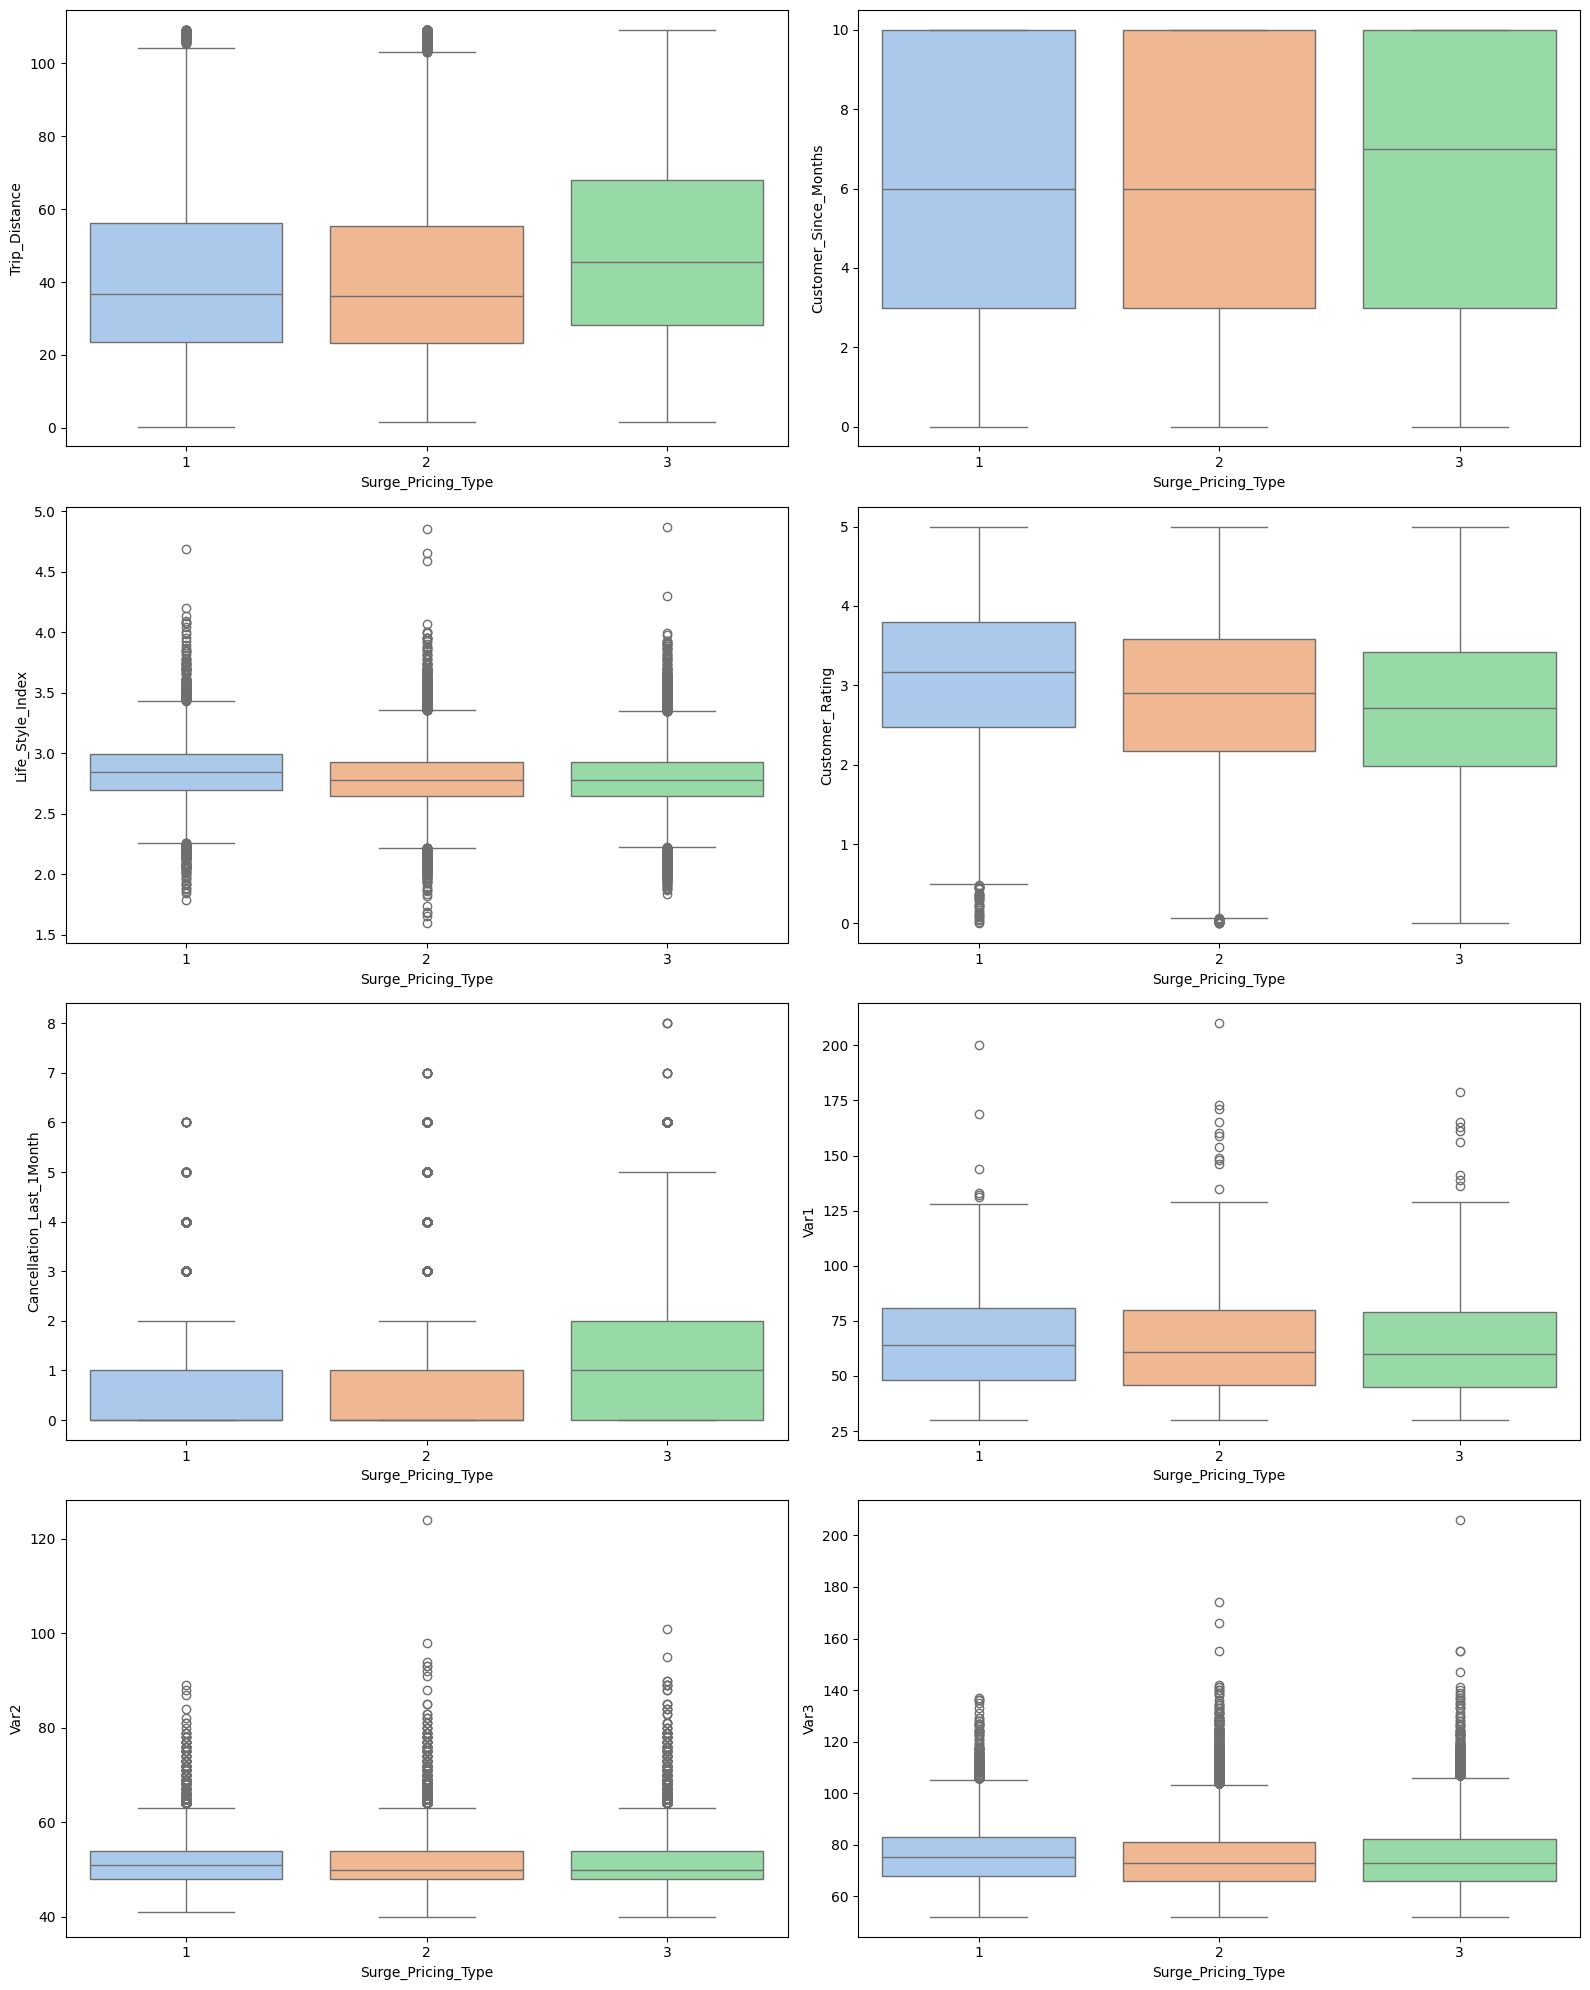

In [7]:
fig = plt.figure()
fig.set_size_inches(16, 20)
i = 0

for col in numeric_cols:
  i += 1
  ax = fig.add_subplot(4, 2, i)
  sns.boxplot(x=data['Surge_Pricing_Type'], y=data[col],
              palette='pastel', hue=data['Surge_Pricing_Type'], legend=False)

fig.tight_layout()
plt.show()

In [8]:
numeric_cols.isna().sum()

,0
Trip_Distance,0
Customer_Since_Months,5920
Life_Style_Index,20193
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,71030
Var2,0
Var3,0


In [9]:
# Заполним пропуски в колонке Customer_Since_Months средним значением
data['Customer_Since_Months'] = data['Customer_Since_Months'].fillna(data['Customer_Since_Months'].mean())

# Так же сделаем и с колонками Life_Style_Index и Var1 (если что, потом просто удалю их)
data['Life_Style_Index'] = data['Life_Style_Index'].fillna(data['Life_Style_Index'].mean())
data['Var1'] = data['Var1'].fillna(data['Var1'].mean())

In [10]:
numeric_cols = data.select_dtypes('number')
numeric_cols.isna().sum()

,0
Trip_Distance,0
Customer_Since_Months,0
Life_Style_Index,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,0
Var2,0
Var3,0
Surge_Pricing_Type,0


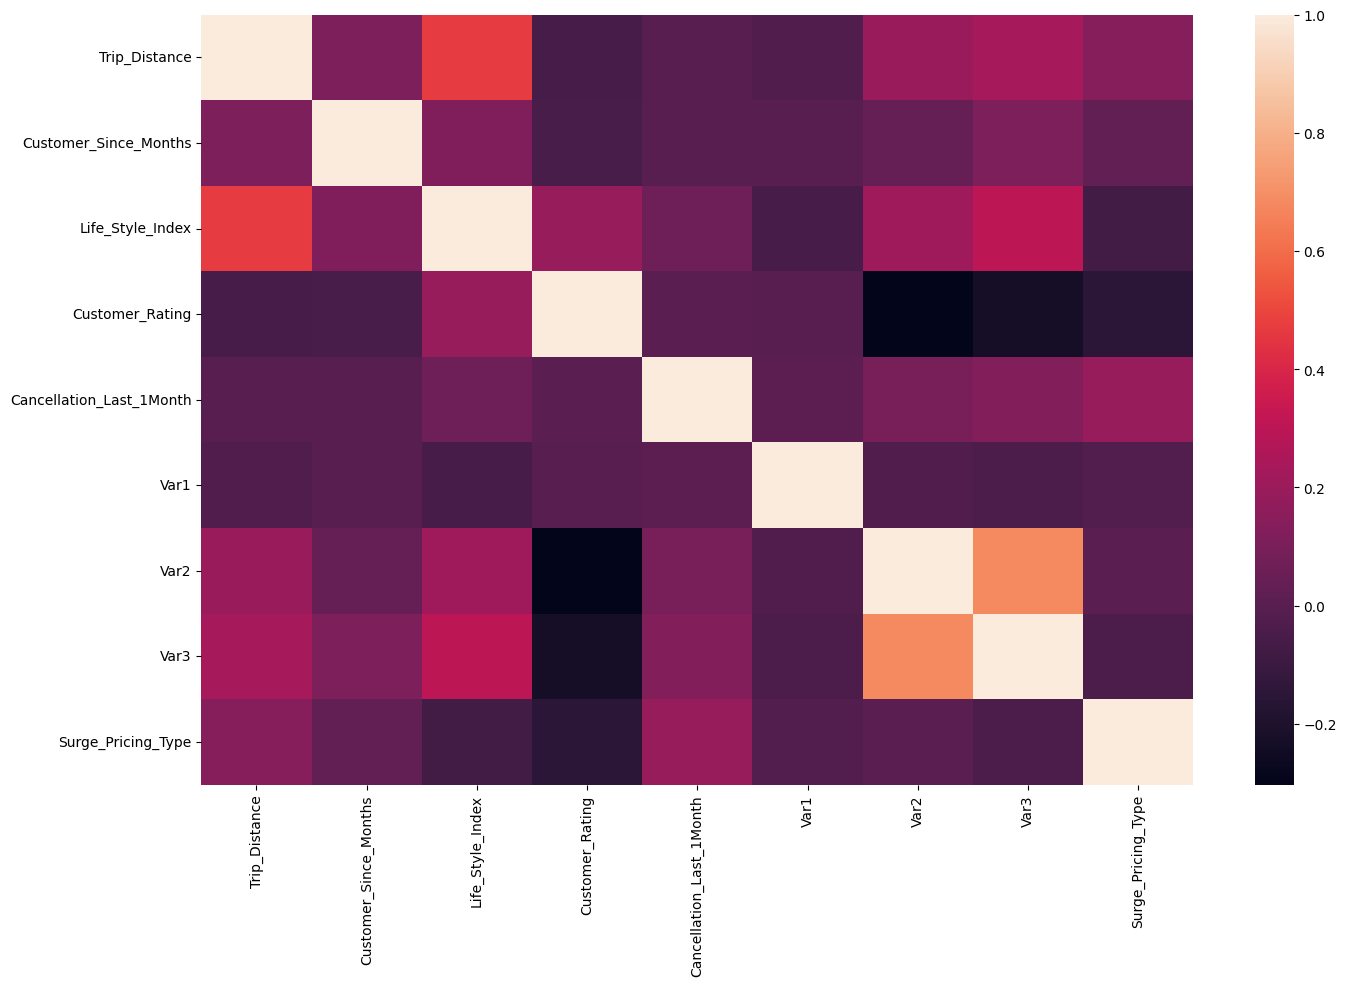

In [11]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(numeric_cols.corr())
plt.show()

In [12]:
data['Var2'].corr(data['Var3'])

np.float64(0.683436913451558)

In [13]:
# Проверка на квазиконстантность, но тут все ок

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(numeric_cols)

cutter.get_feature_names_out()

array(['Trip_Distance', 'Customer_Since_Months', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'], dtype=object)

In [14]:
# Относительно других объектов, корреляция большая
# K тому же признаки Var2, Var3 как-то не сильно влияют на таргет, исходя из ящиков с усами

data = data.drop(['Var1', 'Var3'], axis=1)

## Categorial features

In [15]:
data.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,111452,111469,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


**Описание категориальных признаков**

Type_of_Cab - Категория такси, запрошенная клиентом ✅

Confidence_Life_Style_Index - Индекс уверенности в своем образе жизни (категория, показывающая уверенность по указанному выше индексу) *че это такое??* ✅

Destination_Type - Sigma Cabs делит любой пункт назначения на одну из 14 категорий ✅

Gender - пол ✅

✅ Признак хороший и его точно оставляем

❓ Надо подумать

In [16]:
category_cols = data.select_dtypes('object')

<Figure size 1600x2000 with 0 Axes>

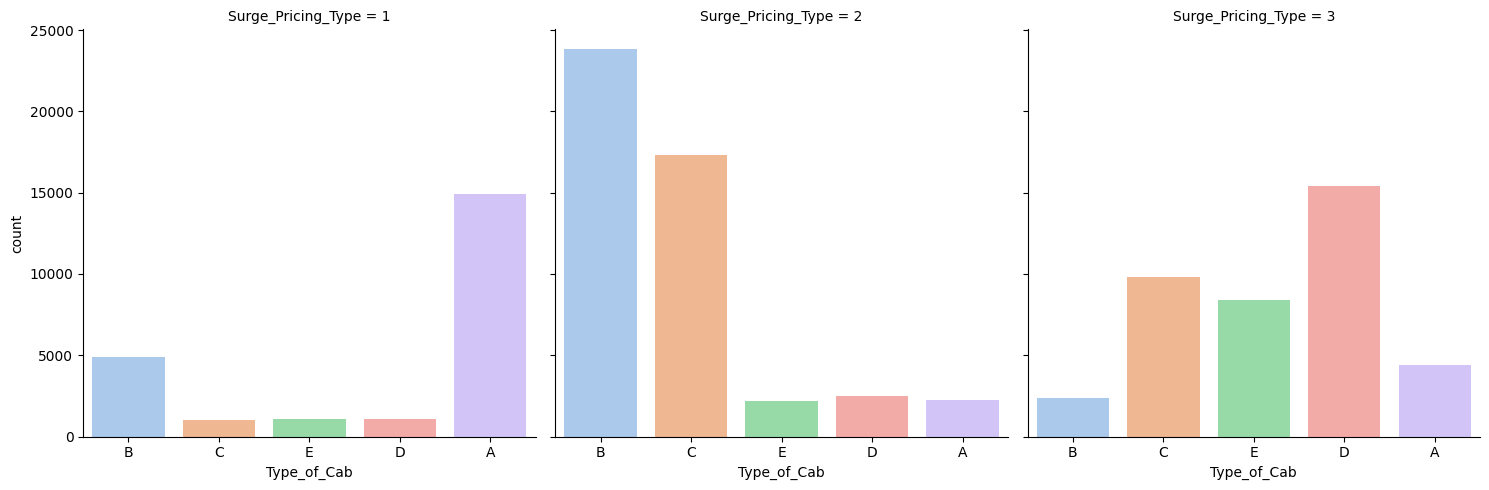

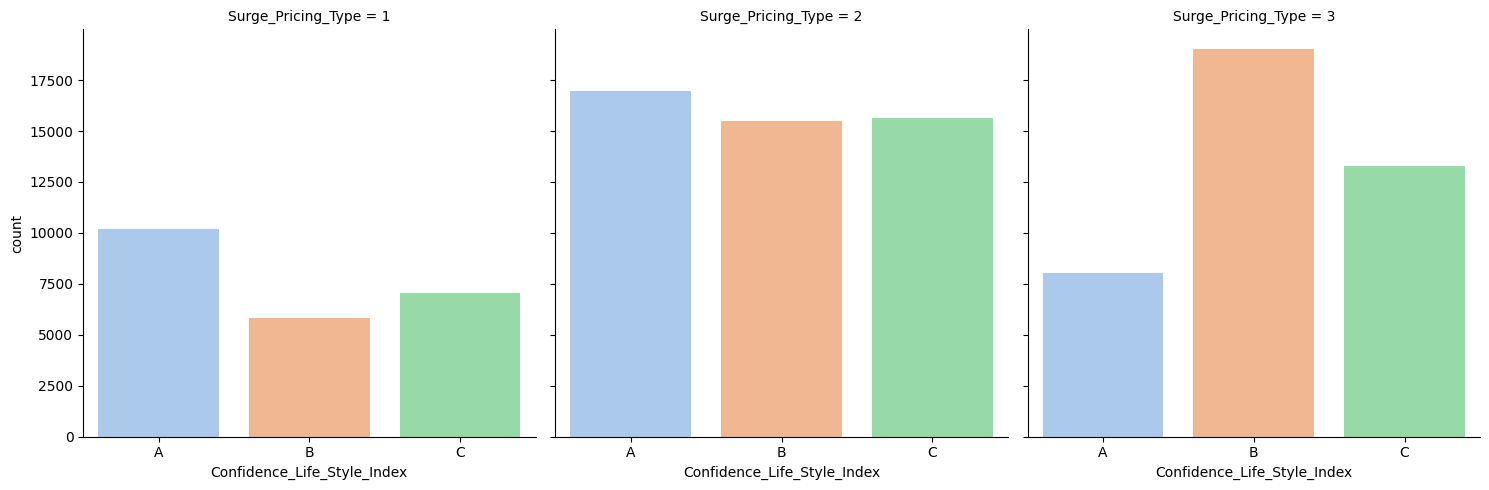

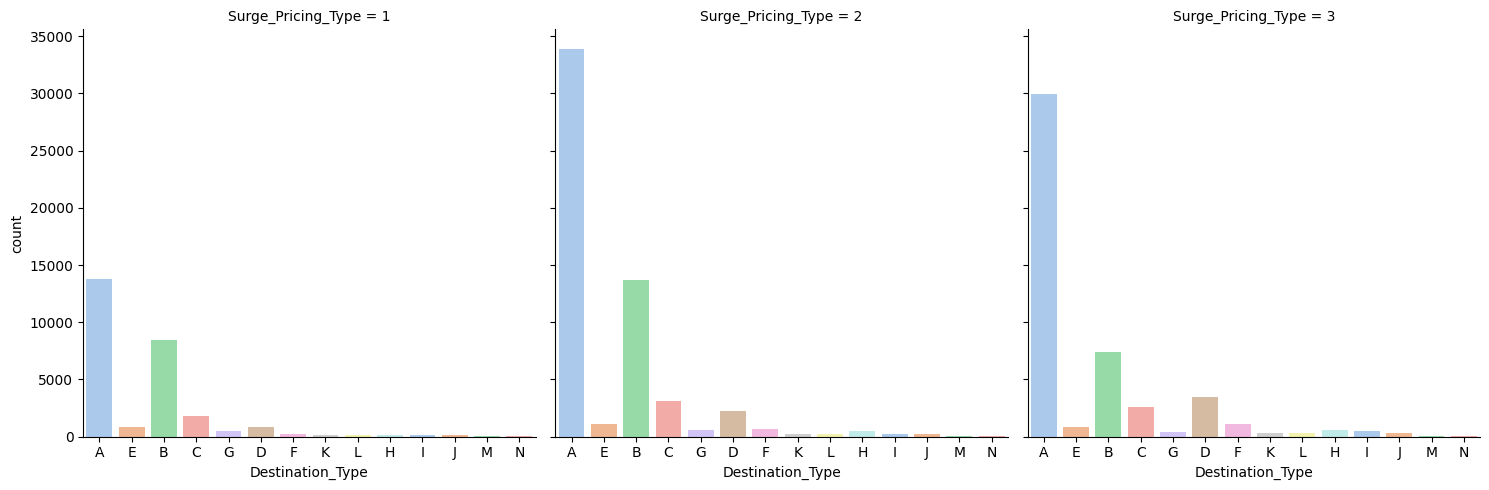

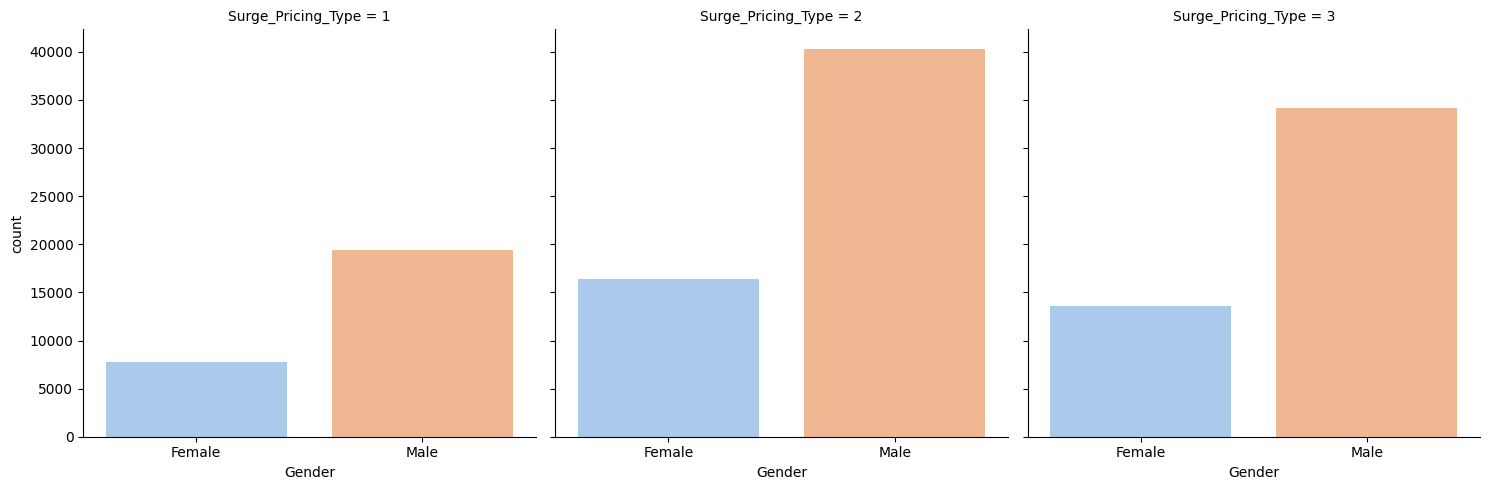

In [17]:
# Посчитаем число объектов каждой категории каждого признака для каждого класса
fig = plt.figure(figsize=(16, 20))

for col in category_cols:
    if col != 'Surge_Pricing_Type':
        g = sns.catplot(x=col, kind='count', col='Surge_Pricing_Type', data=df,
                        hue=col, palette='pastel', legend=False)
plt.show()

In [18]:
# Посмотрим пропуски еще раз
for col in category_cols:
  print(col, data[col].isna().sum())

Type_of_Cab 20210
Confidence_Life_Style_Index 20193
Destination_Type 0
Gender 0


In [19]:
# Заполним пропуски еще одним классом (просто введем отдельное значение для пропусков)
data['Type_of_Cab'] = data['Type_of_Cab'].fillna('F')
data['Confidence_Life_Style_Index'] = data['Confidence_Life_Style_Index'].fillna('D')

data.describe(include='object')

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,6,4,14,2
top,B,B,A,Male
freq,31136,40355,77597,93900


**Encoding**

In [20]:
def encode_multiclass_rarget(df, category, target):
  df = df[[category, target]].copy()
  target_dummies = pd.get_dummies(df[target], prefix=category, drop_first=True)
  df = pd.concat([df, target_dummies], axis=1)
  for tg in target_dummies.columns:
    df[tg] = df.groupby(category)[tg].transform('mean')
  return df.drop([category, target], axis=1)

In [21]:
encode_multiclass_rarget(data, 'Type_of_Cab', 'Surge_Pricing_Type')

,Type_of_Cab_2,Type_of_Cab_3
Trip_ID,,
T0005689460,0.766059,0.075989
T0005689461,0.766059,0.075989
T0005689464,0.427759,0.364176
T0005689465,0.614821,0.348304
T0005689467,0.614821,0.348304
...,...,...
T0005908509,0.132221,0.811700
T0005908510,0.614821,0.348304
T0005908512,0.614821,0.348304


In [22]:
for col in category_cols:
  if len(data[col].value_counts()) < 5:
    encoded_col = pd.get_dummies(data[col], drop_first=True, prefix=col, dtype='int')
    data = pd.concat([data, encoded_col], axis=1).drop(col, axis=1)
  else:
    data = pd.concat([data, encode_multiclass_rarget(data, col, 'Surge_Pricing_Type')], axis=1).drop(col, axis=1)


In [23]:
data

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Surge_Pricing_Type,Type_of_Cab_2,Type_of_Cab_3,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_D,Destination_Type_2,Destination_Type_3,Gender_Male
Trip_ID,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,46,2,0.766059,0.075989,0,0,0,0.437040,0.385737,0
T0005689461,29.47,10.0,2.782450,3.45000,0,56,2,0.766059,0.075989,1,0,0,0.437040,0.385737,1
T0005689464,41.58,10.0,2.802064,3.50125,2,56,2,0.427759,0.364176,0,0,1,0.405226,0.292970,1
T0005689465,61.56,10.0,2.802064,3.45375,0,52,3,0.614821,0.348304,0,0,1,0.437040,0.385737,1
T0005689467,54.95,10.0,3.034530,3.40250,4,49,2,0.614821,0.348304,1,0,0,0.437040,0.385737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,1.0,2.742290,3.28500,0,47,3,0.132221,0.811700,0,0,0,0.437040,0.385737,1
T0005908510,74.81,7.0,2.810590,0.44500,0,63,2,0.614821,0.348304,0,1,0,0.437040,0.385737,1
T0005908512,40.17,10.0,2.995650,3.33625,0,48,2,0.614821,0.348304,1,0,0,0.437040,0.385737,0


# TRAINING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [25]:
X = data.drop('Surge_Pricing_Type', axis=1)
Y = data['Surge_Pricing_Type']

In [26]:
data['Surge_Pricing_Type'].value_counts()

,count
Surge_Pricing_Type,
2,56728
3,47720
1,27214


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    shuffle=True, random_state=42)

## One VS All

In [28]:
from sklearn.multiclass import OneVsRestClassifier


one_vs_all_pipe = Pipeline([('scaller', StandardScaler()),
                            ('one_vs_all_model', OneVsRestClassifier(SGDClassifier()))])
one_vs_all_pipe.fit(x_train, y_train)

Pipeline(steps=[('scaller', StandardScaler()),
                ('one_vs_all_model',
                 OneVsRestClassifier(estimator=SGDClassifier()))])

In [29]:
print(classification_report(y_test, one_vs_all_pipe.predict(x_test), digits=4))

              precision    recall  f1-score   support

           1     0.7004    0.5515    0.6171      5405
           2     0.6517    0.8382    0.7333     11385
           3     0.7419    0.5779    0.6497      9543

    accuracy                         0.6850     26333
   macro avg     0.6980    0.6559    0.6667     26333
weighted avg     0.6944    0.6850    0.6792     26333



In [30]:
param_grid = {
    'one_vs_all_model__estimator__loss': ['hinge', 'log_loss', 'perceptron'],
    'one_vs_all_model__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'one_vs_all_model__estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

one_vs_all_search = GridSearchCV(one_vs_all_pipe, param_grid, cv=5, scoring='accuracy')
one_vs_all_search.fit(X, Y)

print(one_vs_all_search.best_params_)
print(classification_report(y_test, one_vs_all_search.predict(x_test), digits=4))
print(f"Accuracy: {round(np.mean(y_test == one_vs_all_search.predict(x_test)), 4)}")

{'one_vs_all_model__estimator__alpha': 0.01, 'one_vs_all_model__estimator__loss': 'log_loss', 'one_vs_all_model__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1     0.7378    0.5425    0.6252      5405
           2     0.6605    0.8112    0.7282     11385
           3     0.7178    0.6300    0.6710      9543

    accuracy                         0.6904     26333
   macro avg     0.7054    0.6612    0.6748     26333
weighted avg     0.6971    0.6904    0.6863     26333

Accuracy: 0.6904


## All VS All (One VS One)

In [31]:
from sklearn.multiclass import OneVsOneClassifier


one_vs_one_pipe = Pipeline([('scaller', StandardScaler()),
                            ('one_vs_one_model', OneVsOneClassifier(SGDClassifier()))])
one_vs_one_pipe.fit(x_train, y_train)

Pipeline(steps=[('scaller', StandardScaler()),
                ('one_vs_one_model',
                 OneVsOneClassifier(estimator=SGDClassifier()))])

In [32]:
print(classification_report(y_test, one_vs_one_pipe.predict(x_test), digits=4))

              precision    recall  f1-score   support

           1     0.7280    0.5408    0.6206      5405
           2     0.6597    0.8095    0.7270     11385
           3     0.7147    0.6252    0.6669      9543

    accuracy                         0.6875     26333
   macro avg     0.7008    0.6585    0.6715     26333
weighted avg     0.6936    0.6875    0.6834     26333



In [33]:
param_grid = {
    'one_vs_one_model__estimator__loss': ['hinge', 'log_loss', 'perceptron'],
    'one_vs_one_model__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'one_vs_one_model__estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

one_vs_one_search = GridSearchCV(one_vs_one_pipe, param_grid, cv=5, scoring='accuracy')
one_vs_one_search.fit(X, Y)

print(one_vs_one_search.best_params_)
print(classification_report(y_test, one_vs_one_search.predict(x_test), digits=4))
print(f"Accuracy: {round(np.mean(y_test == one_vs_one_search.predict(x_test)), 4)}")

{'one_vs_one_model__estimator__alpha': 0.01, 'one_vs_one_model__estimator__loss': 'log_loss', 'one_vs_one_model__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1     0.7500    0.5378    0.6264      5405
           2     0.6610    0.8157    0.7303     11385
           3     0.7207    0.6349    0.6751      9543

    accuracy                         0.6932     26333
   macro avg     0.7106    0.6628    0.6773     26333
weighted avg     0.7009    0.6932    0.6890     26333

Accuracy: 0.6932
